In [10]:
import numpy as np
import webbrowser
import pandas as pd
from ydata_profiling import ProfileReport

dataset = pd.read_csv('red_wine.csv')


profile = ProfileReport(dataset)


profile.to_widgets()

profile.to_notebook_iframe()

profile.to_file("red_wine.html")
import webbrowser

webbrowser.open('red_wine.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv("red_wine.csv")

# Check the dataset
print(df.head())


X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable


# Create the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation and get accuracy scores
scores = cross_val_score(clf, X, y, cv=10)

# Calculate the mean accuracy from the cross-validation
mean_accuracy = scores.mean()
print(f"Mean Accuracy (10-fold CV): {mean_accuracy:.2f}")





   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low
Mean Accuracy (10-fold CV): 0.75


<IPython.core.display.Javascript object>


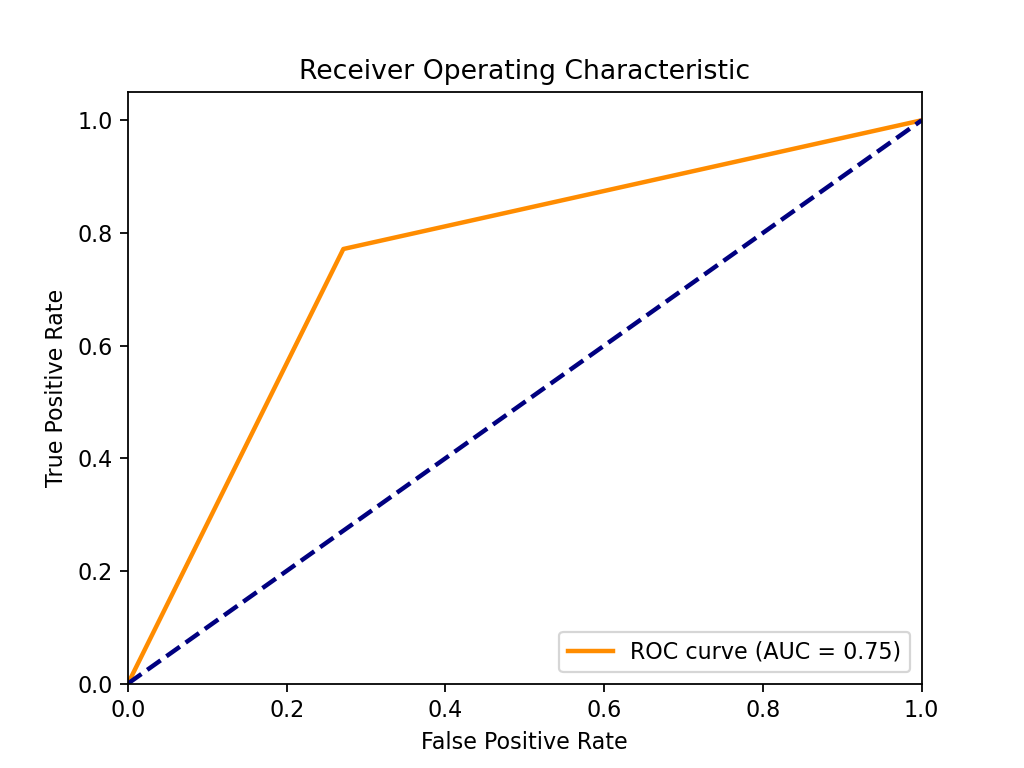

AUC: 0.75


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/3888805932.py:36: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [61]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("red_wine.csv")

# Map the labels to a binary format
df['type'] = df['type'].map({'low': 0, 'high': 1})

X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Create the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1], pos_label=1)  # Specify pos_label
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


Accuracy (10-fold CV): 0.82


<IPython.core.display.Javascript object>


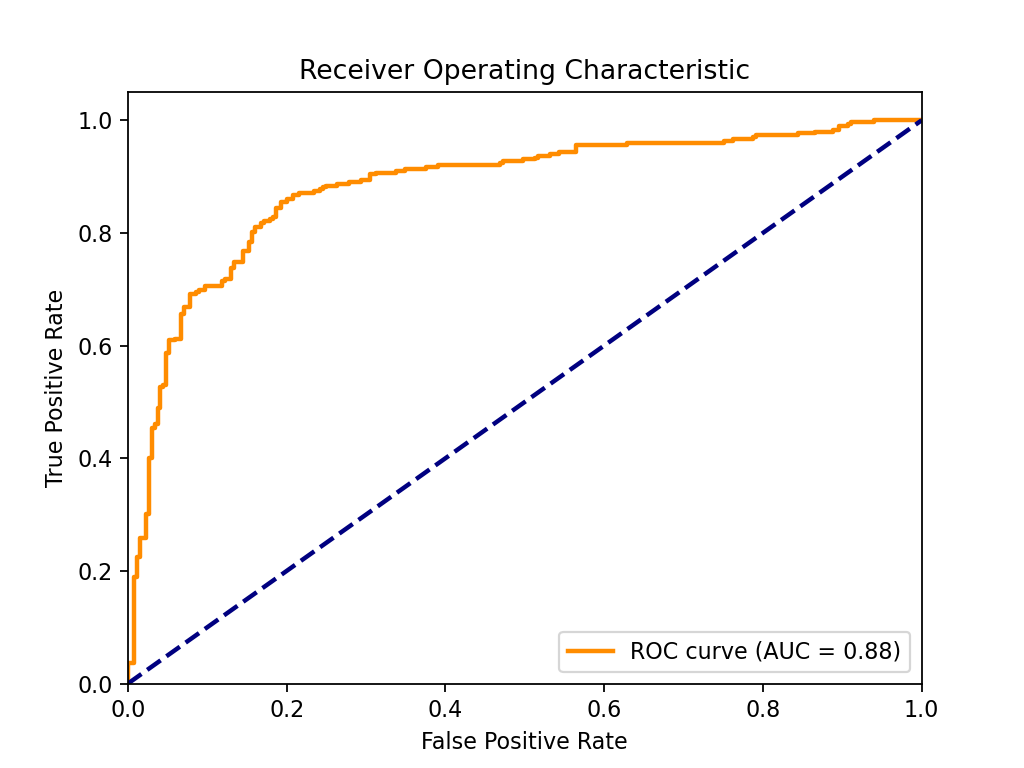

AUC: 0.88


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/1170765597.py:34: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the Gaussian Naive Bayes model
clf = GaussianNB()


# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the Logistic Regression model
clf = LogisticRegression(random_state=42)

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


Accuracy (10-fold CV): 0.78
AUC: 0.87


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/2534221441.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the Linear SVM model
clf = SVC(kernel='linear', probability=True, random_state=42)

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


Accuracy (10-fold CV): 0.79
AUC: 0.87


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/3962449524.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the RBF SVM model
clf = SVC(kernel='rbf', probability=True, random_state=42)

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


Accuracy (10-fold CV): 0.79
AUC: 0.85


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/3923363803.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("red_wine.csv")

# Map the target variable to binary classes (e.g., 'low' to 0 and 'high' to 1)
df['type'] = df['type'].map({'low': 0, 'high': 1})

X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Create a cross-validation object (Stratified K-Folds)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def baseline_accuracy(X, y):
    # Predict the majority class for all instances
    majority_class = np.bincount(y).argmax()
    y_pred = np.full_like(y, fill_value=majority_class)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    return accuracy

def baseline_auc(X, y):
    # Generate random scores for AUC calculation
    y_scores = np.random.rand(len(y), 2)

    # Calculate AUC
    auc = roc_auc_score(y, y_scores[:, 1])

    return auc

# Perform 10-fold cross-validation using the baseline model
accuracy_scores = []
auc_scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    accuracy = baseline_accuracy(X_train, y_train)
    auc = baseline_auc(X_train, y_train)

    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

# Calculate the mean accuracy and AUC
mean_accuracy = np.mean(accuracy_scores)
mean_auc = np.mean(auc_scores)

# Display mean accuracy and AUC
print(f"Baseline Accuracy (10-fold CV): {mean_accuracy:.2f}")
print(f"Baseline AUC (10-fold CV): {mean_auc:.2f}")


Baseline Accuracy (10-fold CV): 0.53
Baseline AUC (10-fold CV): 0.50


Accuracy (10-fold CV): 0.81


<IPython.core.display.Javascript object>


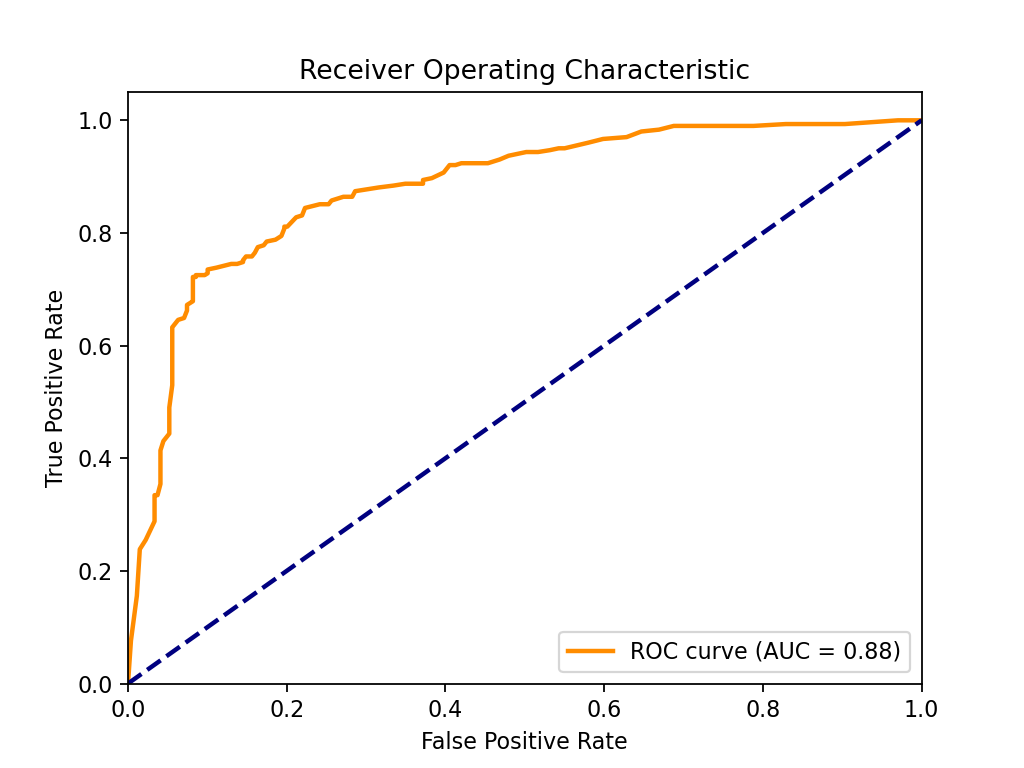

AUC: 0.88


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/2713713628.py:33: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy, AUC, and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


In [52]:
%matplotlib notebook


Accuracy (10-fold CV): 0.94


<IPython.core.display.Javascript object>


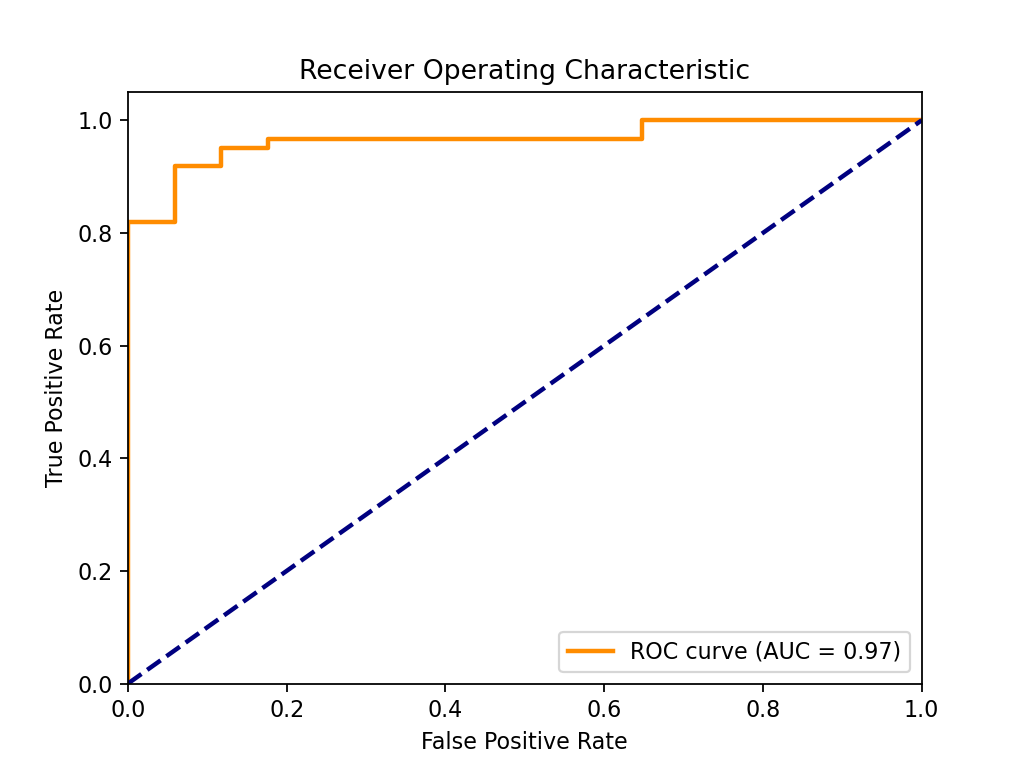

AUC: 0.97


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/2318481489.py:44: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [63]:
import pandas as pd

# Load the dataset
df = pd.read_csv("white_wine.csv")

df['type'] = df['type'].map({'low': 0, 'high': 1})

X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the Gaussian Naive Bayes model
clf = GaussianNB()

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")


Accuracy (10-fold CV): 0.91


<IPython.core.display.Javascript object>


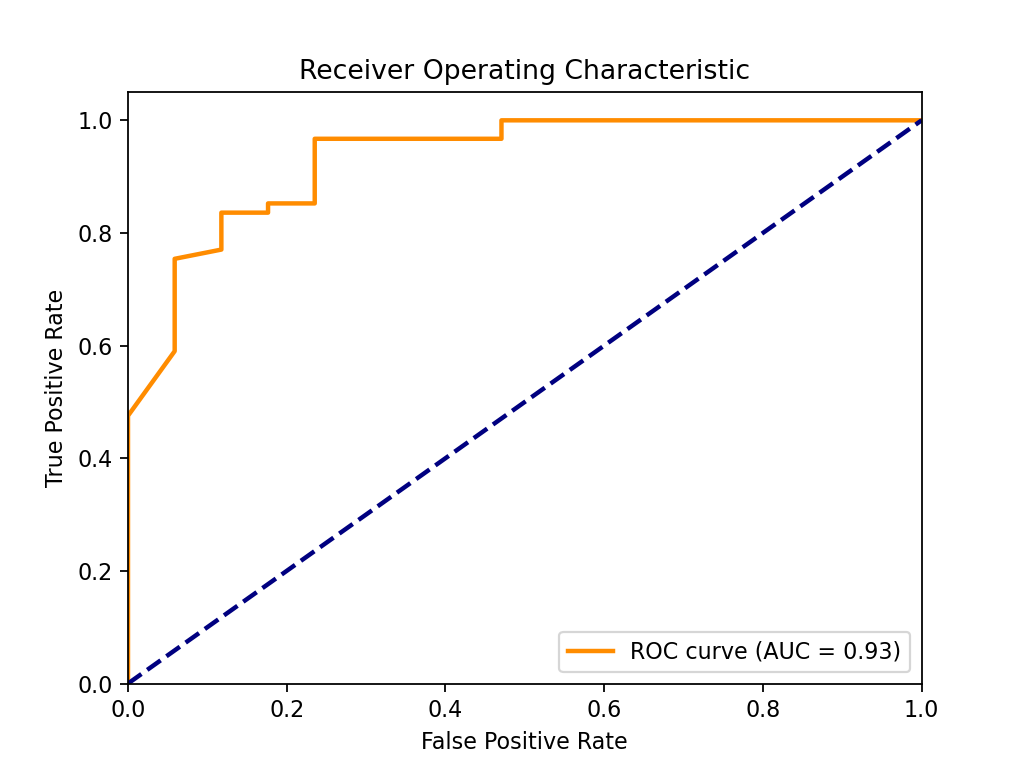

AUC: 0.93


/var/folders/gl/yfrd10rx2wn9m4_b63dbblc40000gn/T/ipykernel_44067/2713713628.py:33: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation and get predicted probabilities
y_scores = cross_val_predict(clf, X, y, cv=10, method="predict_proba")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate accuracy
y_pred = (y_scores[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)

# Display accuracy, AUC, and plot ROC curve
print(f"Accuracy (10-fold CV): {accuracy:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")
